In [1]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Flatten , Dense, Dropout, Activation
from tensorflow.keras.datasets import cifar10

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

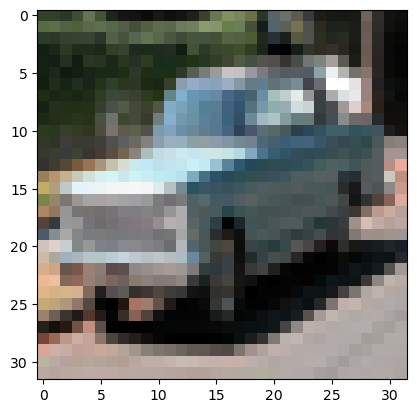

In [5]:
plt.imshow(x_train[32])

### Comenzaremos con una limpieza de datos

In [6]:
#aca llevamos los valores de 0 a 1 para evitar cualquier tipo de sesgo
x_train= x_train.astype("float32")/255
x_test= x_test.astype("float32")/255

In [7]:
#haremos una clasificación 
num_classes = len(np.unique(y_train))
y_train=to_categorical(y_train, num_classes) #usamos la función "to_categorical" que sabemos que nos crea un arreglo con 0 y 1 por cada dato
y_test= to_categorical(y_test, num_classes)


In [8]:
#Tenemos 10 diferentes posibles salidas
num_classes

10

### Ahora que tenemos los datos mas organizados realizaremos una división de los datos entre validación , entrenamiento y test

In [9]:
(x_train ,x_valid)= x_train[5000:], x_train[:5000]
(y_train ,y_valid)= y_train[5000:], y_train[:5000]

print("x_train shape: " ,x_train.shape[0])

print("train ", x_train.shape[0])
print("val ", x_valid.shape[0])
print("test ", x_test.shape[0])


x_train shape:  45000
train  45000
val  5000
test  10000


### Crearemos el modelo de CNN

In [10]:
base_filtros=32
w_regularizer=1e-4

In [11]:
model=Sequential()
#primero tendremos una capa de convolución y luego una de activación
#conv1
model.add(Conv2D(base_filtros,(3,3),padding="same",kernel_regularizer=regularizers.l2(w_regularizer),input_shape=(32,32,3)))
model.add(Activation("relu"))

#conv2
model.add(Conv2D(base_filtros,(3,3),padding="same",kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#conv3
model.add(Conv2D(2*base_filtros,(3,3),padding="same",kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation("relu"))
model.add(Dropout(0.2))

#conv4
model.add(Conv2D(2*base_filtros,(3,3),padding="same",kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#conv5
model.add(Conv2D(4*base_filtros,(3,3),padding="same",kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation("relu"))

#conv6
model.add(Conv2D(4*base_filtros,(3,3),padding="same",kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#Clasificacion - flatten 
model.add(Flatten())
model.add(Dense(num_classes,activation="softmax"))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

## entrenaremos el modelo

In [12]:
model.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

In [13]:
hist= model.fit(x_train, y_train, 
                batch_size=32, 
                epochs=100,
                validation_data=(x_valid,y_valid),
                verbose=2, shuffle=True
               )

Epoch 1/100


2023-03-28 17:00:19.021088: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1407/1407 - 18s - loss: 1.7352 - accuracy: 0.3737 - val_loss: 1.3675 - val_accuracy: 0.5226 - 18s/epoch - 13ms/step
Epoch 2/100
1407/1407 - 8s - loss: 1.2712 - accuracy: 0.5643 - val_loss: 1.1179 - val_accuracy: 0.6156 - 8s/epoch - 6ms/step
Epoch 3/100
1407/1407 - 8s - loss: 1.0983 - accuracy: 0.6369 - val_loss: 1.0217 - val_accuracy: 0.6618 - 8s/epoch - 6ms/step
Epoch 4/100
1407/1407 - 8s - loss: 1.0010 - accuracy: 0.6762 - val_loss: 1.0697 - val_accuracy: 0.6726 - 8s/epoch - 6ms/step
Epoch 5/100
1407/1407 - 9s - loss: 0.9422 - accuracy: 0.7017 - val_loss: 0.8263 - val_accuracy: 0.7462 - 9s/epoch - 6ms/step
Epoch 6/100
1407/1407 - 8s - loss: 0.9005 - accuracy: 0.7203 - val_loss: 0.9304 - val_accuracy: 0.6972 - 8s/epoch - 6ms/step
Epoch 7/100
1407/1407 - 8s - loss: 0.8768 - accuracy: 0.7308 - val_loss: 1.0389 - val_accuracy: 0.6994 - 8s/epoch - 6ms/step
Epoch 8/100
1407/1407 - 8s - loss: 0.8593 - accuracy: 0.7415 - val_loss: 0.9542 - val_accuracy: 0.7166 - 8s/epoch - 6ms/step
Epoch 9/1

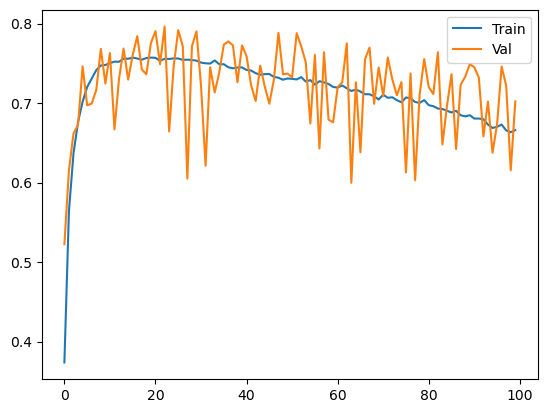

In [14]:
plt.plot(hist.history["accuracy"],label="Train")
plt.plot(hist.history["val_accuracy"],label="Val")
plt.legend()
plt.show()

In [15]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0979 - accuracy: 0.6912


[1.0979079008102417, 0.6912000179290771]